In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data=pd.read_csv('Desktop/Data/MNC_Salaries.csv')

In [3]:
data.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
Height      457 non-null object
Weight      457 non-null int64
College     373 non-null object
Salary      446 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.2+ KB


In [5]:
data.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64

In [6]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


In [7]:
data["College"].fillna("No College", inplace=True)

In [8]:
data['Salary'].fillna(data['Salary'].mean(),inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
Name        457 non-null object
Team        457 non-null object
Number      457 non-null int64
Position    457 non-null object
Age         457 non-null int64
Height      457 non-null object
Weight      457 non-null int64
College     457 non-null object
Salary      457 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.2+ KB


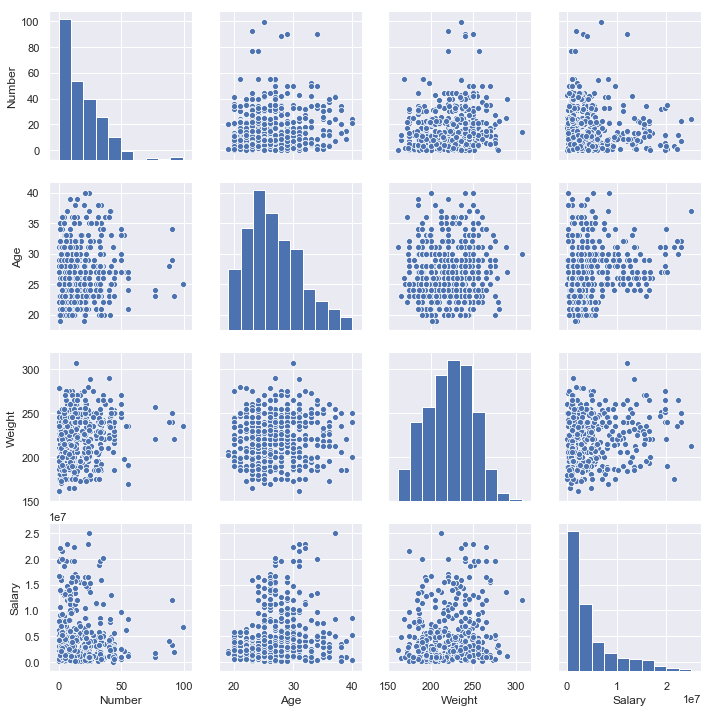

In [10]:
sns.pairplot(data)

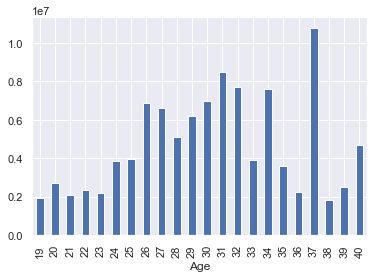

In [11]:
data.groupby('Age').Salary.mean().plot(kind='bar')

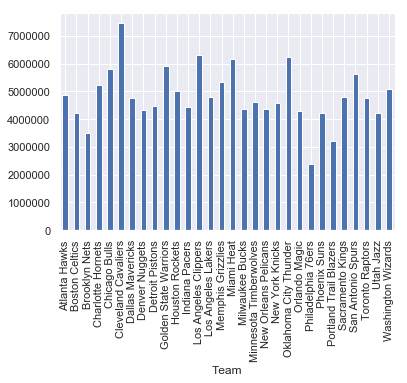

In [12]:
data.groupby('Team').Salary.mean().plot(kind='bar')

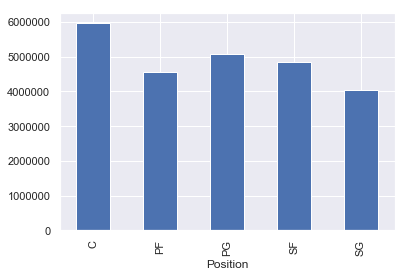

In [13]:
data.groupby('Position').Salary.mean().plot(kind='bar')

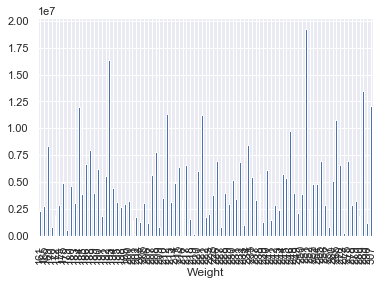

In [14]:
data.groupby('Weight').Salary.mean().plot(kind='bar')

In [15]:
data.drop(['Height', 'Name','Team','College'], axis=1, inplace=True)

In [16]:
data = pd.get_dummies(data, columns=['Position'])

In [17]:
data.corr()

,Number,Age,Weight,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
Number,1.000000,0.028724,0.206921,-0.111436,0.117459,0.195515,-0.211256,-0.001995,-0.094960
Age,0.028724,1.000000,0.087183,0.210627,0.044659,0.026620,-0.010374,-0.008683,-0.048679
Weight,0.206921,0.087183,1.000000,0.135552,0.562900,0.379911,-0.610797,0.004600,-0.301937
Salary,-0.111436,0.210627,0.135552,1.000000,0.098850,-0.027877,0.021884,0.001346,-0.083968
Position_C,0.117459,0.044659,0.562900,0.098850,1.000000,-0.240101,-0.227759,-0.216853,-0.243172
Position_PF,0.195515,0.026620,0.379911,-0.027877,-0.240101,1.000000,-0.265713,-0.252990,-0.283695
Position_PG,-0.211256,-0.010374,-0.610797,0.021884,-0.227759,-0.265713,1.000000,-0.239986,-0.269112
Position_SF,-0.001995,-0.008683,0.004600,0.001346,-0.216853,-0.252990,-0.239986,1.000000,-0.256226
Position_SG,-0.094960,-0.048679,-0.301937,-0.083968,-0.243172,-0.283695,-0.269112,-0.256226,1.000000


In [18]:
data.head()

,Number,Age,Weight,Salary,Position_C,Position_PF,Position_PG,Position_SF,Position_SG
0,0,25,180,7.730337e+06,0,0,1,0,0
1,99,25,235,6.796117e+06,0,0,0,1,0
2,30,27,205,4.842684e+06,0,0,0,0,1
3,28,22,185,1.148640e+06,0,0,0,0,1
4,8,29,231,5.000000e+06,0,1,0,0,0


In [19]:
#Age and Weight only adding significant positive correlation values
X = data.iloc[:,1:3].values
y = data['Salary']

In [20]:
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
X = MMscaler.fit_transform(X)

C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
linreg_pred = linreg.predict(X_test)

In [25]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
print('MAE' , metrics.mean_absolute_error(y_test,linreg_pred))
print('RMSE' ,np.sqrt(metrics.mean_squared_error(y_test,linreg_pred)))

MAE 3797515.5129921883
RMSE 5175587.3267874
